In [ ]:
#Importing Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn. metrics import classification_report

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
# load the training dataset (dropping rows with nulls)
new_data = pd.read_csv('Label All Data.csv').dropna()
# Display a random sample of 10 observations
new_data.sample(10)

,Depth,S1,S2,S1 + S2,S3,S2/S3,TOC,HI,OI,PP,PI,Tmax,S1/TOC,Ro,classes
73,1980,0.15,5.94,6.09,0.44,13.504773,1.58,376.56,27.88,0.02,6.09,417.0,0.095000,0.350,Very Good/Poor
328,2733,0.12,1.63,1.75,0.52,3.130000,0.66,246.22,78.55,1.75,0.07,429.0,0.182000,0.560,Poor/Fair
610,4020,0.36,0.14,0.50,0.72,0.190000,0.29,48.00,248.00,0.50,0.72,400.0,1.241379,0.040,Poor
600,3913,0.30,0.30,0.60,0.70,0.430000,0.21,143.00,333.00,0.60,0.50,399.0,1.428571,0.022,Poor
606,3971,0.55,7.24,7.79,0.84,8.620000,3.60,201.00,23.00,7.80,0.07,433.0,0.152778,0.634,Very Good/Poor
613,4062,2.30,1.40,3.70,0.89,1.570000,0.81,173.00,110.00,3.70,0.62,416.0,2.839506,0.328,Fair
394,3810,0.09,1.72,1.81,0.33,5.210000,1.12,154.26,29.60,1.81,0.05,439.0,0.080717,0.740,Poor/Good
192,1780,0.17,8.04,8.21,0.54,14.890000,2.63,306.20,20.56,8.21,0.02,425.0,0.065000,0.490,Very Good/Poor
358,3018,0.08,1.69,1.77,0.40,4.230000,0.79,213.38,50.51,1.77,0.05,430.0,0.101000,0.580,Poor/Fair
433,4600,18.07,6.80,24.87,1.30,5.230000,1.94,351.00,67.00,24.90,0.73,441.0,9.314433,1.360,Excellent/Good


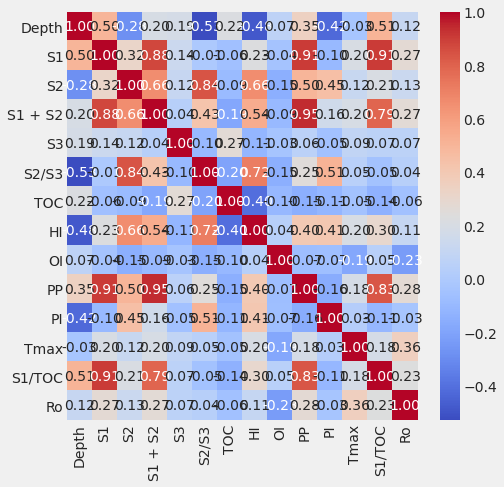

In [ ]:
plt.figure(figsize=(7,7))
g = sns.heatmap(new_data[["Depth","S1","S2","S1 + S2","S3", "S2/S3", "TOC", "HI", "OI", "PP", "PI", "Tmax", "S1/TOC", "Ro"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

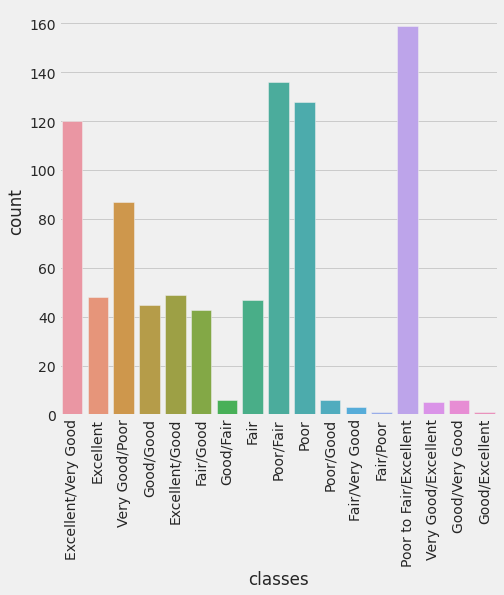

In [ ]:
plt.figure(figsize=(7,7))
g = sns.countplot(x="classes",data=new_data)
g = plt.setp(g.get_xticklabels(), rotation=90) 

In [ ]:
# Separate features and labels
features = new_data[new_data.columns[0:14]]
label = new_data[new_data.columns[14]]
X, y = features.values, label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kfold = StratifiedKFold(n_splits=10)

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_test_maxabs = max_abs_scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

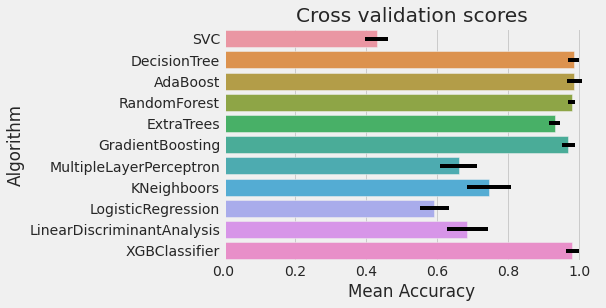

In [ ]:
# Ploting graph of accuracry score of Models
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis", "XGBClassifier"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred, average='micro')}\n\tRecall Score: {recall_score(y_train, pred, average='micro')}\n\tF1 score: {f1_score(y_train, pred, average='micro')}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        print(type(y_train), type(pred))
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred, average='micro')}\n\tRecall Score: {recall_score(y_test, pred, average='micro')}\n\tF1 score: {f1_score(y_test, pred, average='micro')}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
### META MODELING  WITH DECISIONTREE, ADABOOST, XGBClassifier

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train_maxabs,y_train) 

ada_best = gsadaDTC.best_estimator_

# Best score
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    7.1s finished


0.9856118791602663

In [ ]:
print_score(ada_best, X_train_maxabs, y_train, X_test_maxabs, y_test, train=False)

Test Result:
accuracy score: 0.9812734082397003

Classification Report: 
 	Precision: 0.9812734082397003
	Recall Score: 0.9812734082397003
	F1 score: 0.9812734082397003

Confusion Matrix: 
 [[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]


In [ ]:
# XGBClassifier
XGB = XGBClassifier()

xgb_param_grid = {"n_estimators" :[100,300],
                  'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
                   "criterion": ["gini"],
                   'max_depth': [4, 8],
                   'min_samples_leaf': [100,150],
                   'max_features': [0.3, 0.1] }
gsxgb = GridSearchCV(XGB, param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsxgb.fit(X_train_maxabs,y_train)

XGB_best = gsxgb.best_estimator_

# Best score
gsxgb.best_score_                      

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   54.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  9.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 13.6min
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed: 16.3min finished


0.9855862775217614

In [ ]:
# make predictions for test data
y_pred = XGB_best.predict(X_test_maxabs)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{}".format(accuracy))
print(f"Classification Report: \n \tPrecision: {precision_score(y_test, y_pred, average='micro')}\n\tRecall Score: {recall_score(y_test, y_pred, average='micro')}\n\tF1 score: {f1_score(y_test, y_pred, average='micro')}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Accuracy:0.9737827715355806
Classification Report: 
 	Precision: 0.9737827715355806
	Recall Score: 0.9737827715355806
	F1 score: 0.9737827715355806

Confusion Matrix: 
 [[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  1  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 27]]



In [ ]:
#DECISION TREE
DTC = DecisionTreeClassifier()

dtc_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "criterion": ["gini"]}

gsDTC = GridSearchCV(DTC,param_grid = dtc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsDTC.fit(X_train_maxabs,y_train)

dtc_best = gsDTC.best_estimator_

# Best score
gsDTC.best_score_

Fitting 10 folds for each of 27 candidates, totalling 270 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 263 out of 270 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:    0.9s finished


0.9791602662570404

In [ ]:
print_score(dtc_best, X_train_maxabs, y_train, X_test_maxabs, y_test, train=False)

Test Result:
accuracy score: 0.9812734082397003

Classification Report: 
 	Precision: 0.9812734082397003
	Recall Score: 0.9812734082397003
	F1 score: 0.9812734082397003

Confusion Matrix: 
 [[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 44  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


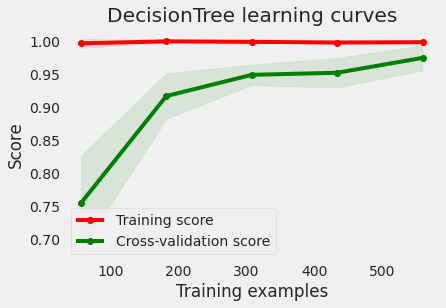

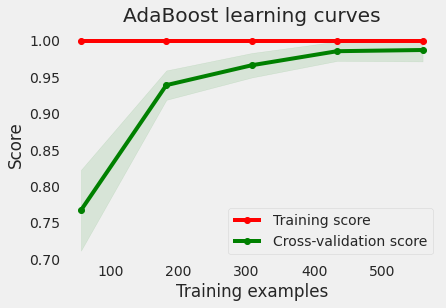

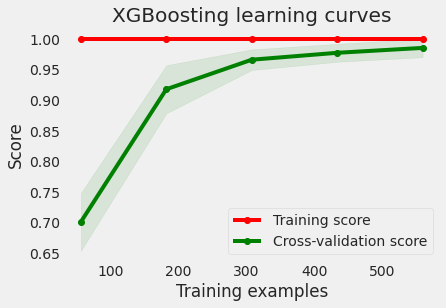

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsDTC.best_estimator_,"DecisionTree learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsxgb.best_estimator_,"XGBoosting learning curves",X_train,y_train,cv=kfold)

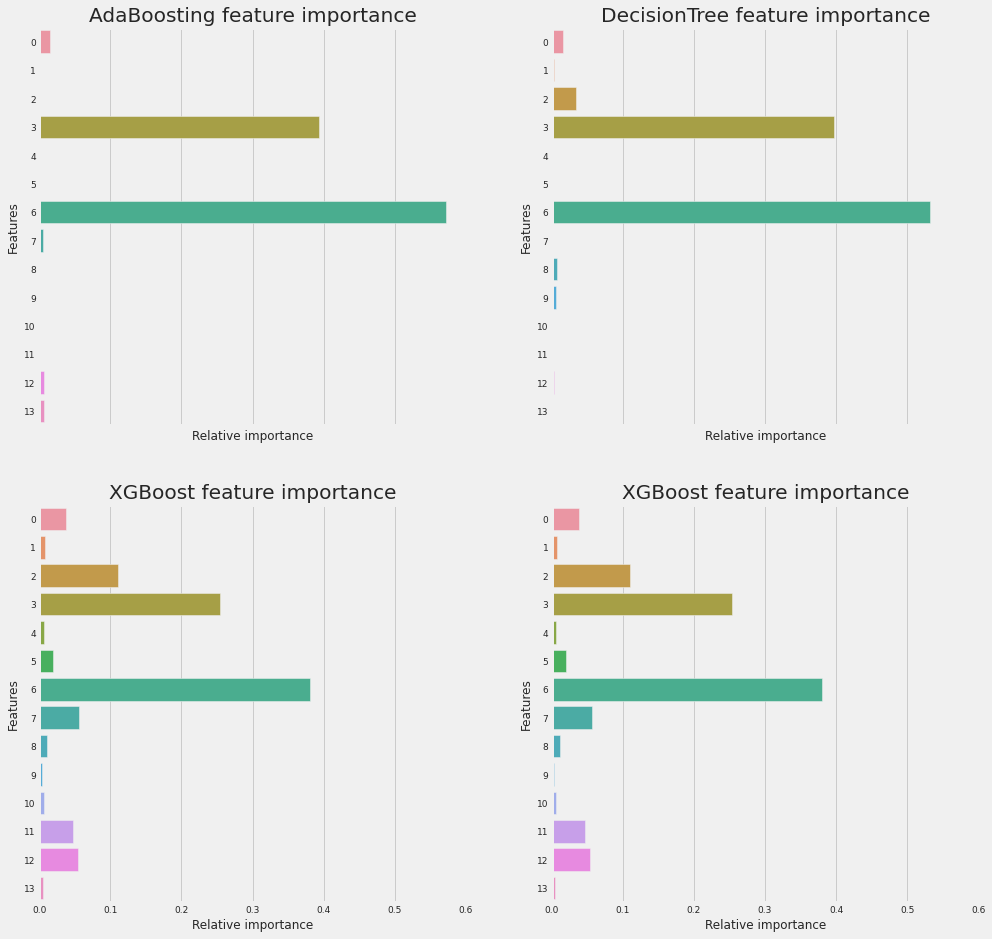

In [ ]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best), ("DecisionTree", dtc_best), ("XGBoost", XGB_best), ("XGBoost", XGB_best)]
nclassifier = 0
X_train = pd.DataFrame(X_train)
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [ ]:
votingC = VotingClassifier(estimators=[('dtc', dtc_best), ('adac',ada_best),("xgb", XGB_best)], voting='hard', n_jobs=4)

#votingC = 
votingC.fit(X_train_maxabs, y_train)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=10,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=3,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
    

In [ ]:
# make predictions for test data
y_pred = votingC.predict(pd.DataFrame(X_test_maxabs))
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{}".format(accuracy))
print(f"Classification Report: \n \tPrecision: {precision_score(y_test, y_pred, average='micro')}\n\tRecall Score: {recall_score(y_test, y_pred, average='micro')}\n\tF1 score: {f1_score(y_test, y_pred, average='micro')}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Accuracy:0.9737827715355806
Classification Report: 
 	Precision: 0.9737827715355806
	Recall Score: 0.9737827715355806
	F1 score: 0.9737827715355806

Confusion Matrix: 
 [[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 27]]

